In [81]:
import requests
import json
import pandas as pd

In [82]:
ls

CTG.xls            EDA.ipynb          README.md          import_data.ipynb


In [83]:
df = pd.read_excel('CTG.xls', sheet_name='Raw Data')

In [84]:
df = df.drop(0)
df = df[:-3]

In [85]:
df.head()
df = df.reset_index()
df = df.drop('index', axis=1)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 40 columns):
FileName    2126 non-null object
Date        2126 non-null datetime64[ns]
SegFile     2126 non-null object
b           2126 non-null float64
e           2126 non-null float64
LBE         2126 non-null float64
LB          2126 non-null float64
AC          2126 non-null float64
FM          2126 non-null float64
UC          2126 non-null float64
ASTV        2126 non-null float64
MSTV        2126 non-null float64
ALTV        2126 non-null float64
MLTV        2126 non-null float64
DL          2126 non-null float64
DS          2126 non-null float64
DP          2126 non-null float64
DR          2126 non-null float64
Width       2126 non-null float64
Min         2126 non-null float64
Max         2126 non-null float64
Nmax        2126 non-null float64
Nzeros      2126 non-null float64
Mode        2126 non-null float64
Mean        2126 non-null float64
Median      2126 non-null float64
Vari

In [87]:
df = df.drop(['FileName', 'Date', 'SegFile', 'A', 'B', 'C', 'D', 'AD', 'DE', 'LD', 'FS', 'SUSP', 'E'], axis=1)

In [88]:
df.head()

,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
0,240.0,357.0,120.0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,...,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,9.0,2.0
1,5.0,632.0,132.0,132.0,4.0,0.0,4.0,17.0,2.1,0.0,...,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,6.0,1.0
2,177.0,779.0,133.0,133.0,2.0,0.0,5.0,16.0,2.1,0.0,...,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,6.0,1.0
3,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,16.0,2.4,0.0,...,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,6.0,1.0
4,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,16.0,2.4,0.0,...,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,2.0,1.0


In [89]:
X = df.drop(['CLASS', 'NSP'], axis=1)
y = df['NSP']

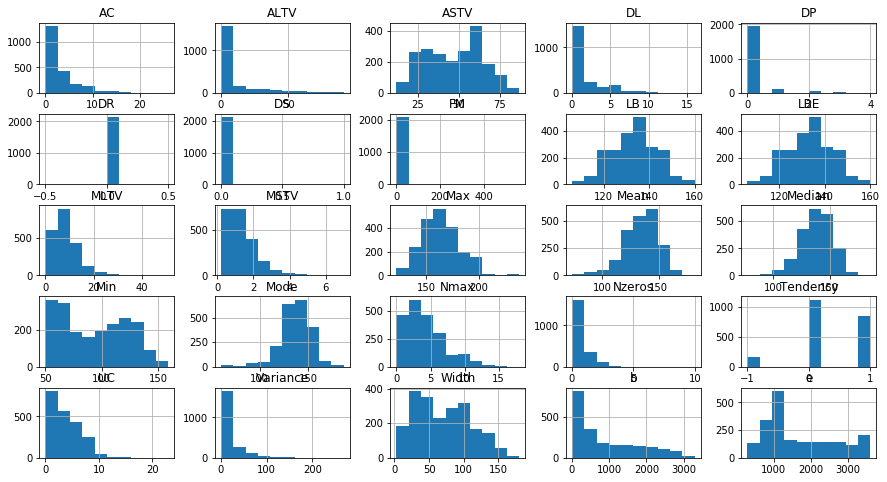

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline

X.hist(figsize=(15, 8));

In [91]:
X['Tendency'].unique()

array([ 1.,  0., -1.])

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [93]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(categories='auto')
enc.fit(X_train[['Tendency']])

OneHotEncoder(categorical_features=None, categories='auto',
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True)

In [94]:
encoded = enc.transform(X_train[['Tendency']]).toarray()

In [95]:
enc.categories_

[array([-1.,  0.,  1.])]

In [96]:
one_hotted = pd.DataFrame(encoded, columns=enc.categories_)
one_hotted.head()


,-1.0,0.0,1.0
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0


In [97]:
X_train = X_train.reset_index()
X_train = X_train.drop('index', axis=1)

df_full = pd.concat([X_train, one_hotted], axis=1)


In [98]:
df_full.head()

,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,...,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,"(-1.0,)","(0.0,)","(1.0,)"
0,524.0,1189.0,128.0,128.0,5.0,0.0,5.0,42.0,2.4,0.0,...,12.0,2.0,133.0,130.0,133.0,24.0,0.0,0.0,1.0,0.0
1,1774.0,2250.0,145.0,145.0,7.0,4.0,1.0,43.0,1.5,0.0,...,5.0,0.0,156.0,156.0,158.0,11.0,1.0,0.0,0.0,1.0
2,346.0,1007.0,130.0,130.0,0.0,1.0,0.0,59.0,0.4,37.0,...,2.0,0.0,129.0,132.0,132.0,2.0,-1.0,1.0,0.0,0.0
3,1949.0,3256.0,133.0,133.0,0.0,0.0,13.0,61.0,2.8,0.0,...,4.0,0.0,125.0,95.0,103.0,95.0,0.0,0.0,1.0,0.0
4,1971.0,2847.0,125.0,125.0,0.0,0.0,8.0,65.0,1.3,0.0,...,5.0,1.0,116.0,111.0,116.0,8.0,0.0,0.0,1.0,0.0


In [99]:
X_train_full = df_full.drop('Tendency', axis=1)

In [100]:
encoded_test = enc.transform(X_test[['Tendency']]).toarray()

In [101]:
one_hotted_test = pd.DataFrame(encoded_test, columns=enc.categories_)

In [102]:
X_test = X_test.reset_index()
X_test = X_test.drop('index', axis=1)

df_full_test = pd.concat([X_test, one_hotted_test], axis=1)
X_test_full = df_full_test.drop('Tendency', axis=1)

In [103]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled_X_train = ss.fit_transform(X_train_full)
scaled_X_test = ss.transform(X_test_full)

In [104]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [105]:
param_grid = {
    'n_neighbors': [5, 3, 10],
    'p': [2, 3, 4],
    'weights':['uniform', 'distance']
} 

In [106]:

gscv = GridSearchCV(knn, param_grid=param_grid, cv=5)
gscv.fit(X_train_full, y_train)
best_params = gscv.best_params_
best_params

# preds_train = knn.predict(X_train_full)
# preds_test = knn.predict(X_test_full)

{'n_neighbors': 5, 'p': 2, 'weights': 'distance'}

In [107]:
knn = KNeighborsClassifier(n_neighbors=5, p=2, weights='distance')
knn.fit(X_train_full, y_train)
preds_train = knn.predict(X_train_full)
preds_test = knn.predict(X_test_full)


In [108]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix 

In [109]:
acc_train = accuracy_score(y_train, preds_train)
acc_test = accuracy_score(y_test, preds_test)
rec_train = recall_score(y_train, preds_train, average='micro')
rec_test = recall_score(y_test, preds_test, average='micro')
prec_train = precision_score(y_train, preds_train, average='micro')
prec_test = precision_score(y_test, preds_test, average='micro')
cm = confusion_matrix(y_test, preds_test)

In [110]:
print(f'Training Accuracy: {acc_train}')
print(f'Testing Accuracy: {acc_test}')
print(f'Training Recall: {rec_train}')
print(f'Testing Recall: {rec_train}')
print(f'Training Precision: {prec_train}')
print(f'Testing Precision: {prec_test}')


Training Accuracy: 0.9993726474278545
Testing Accuracy: 0.8214285714285714
Training Recall: 0.9993726474278545
Testing Recall: 0.9993726474278545
Training Precision: 0.9993726474278545
Testing Precision: 0.8214285714285714


In [111]:
df_confusion = pd.crosstab(y_test, preds_test, rownames=['True'], colnames=['Predicted'], margins=True)

In [112]:
df_confusion

Predicted,1.0,2.0,3.0,All
True,,,,
1.0,399,15,3,417
2.0,44,26,2,72
3.0,27,4,12,43
All,470,45,17,532


# Decision Tree

In [113]:
from sklearn.tree import DecisionTreeClassifier

In [114]:
dec_tree = DecisionTreeClassifier(max_depth=5)

In [115]:
dec_tree.fit(X_train_full, y_train)
y_train_hat = dec_tree.predict(X_train_full)
y_test_hat = dec_tree.predict(X_test_full)

In [118]:
acc_train = accuracy_score(y_train, y_train_hat)
acc_test = accuracy_score(y_test, y_test_hat)
rec_train = recall_score(y_train, y_train_hat, average='micro')
rec_test = recall_score(y_test, y_test_hat, average='micro')
prec_train = precision_score(y_train, y_train_hat, average='micro')
prec_test = precision_score(y_test, y_test_hat, average='micro')
cm = confusion_matrix(y_test, y_test_hat)

In [119]:
print(f'Training Accuracy: {acc_train}')
print(f'Testing Accuracy: {acc_test}')
print(f'Training Recall: {rec_train}')
print(f'Testing Recall: {rec_train}')
print(f'Training Precision: {prec_train}')
print(f'Testing Precision: {prec_test}')

Training Accuracy: 0.9347553324968633
Testing Accuracy: 0.9285714285714286
Training Recall: 0.9347553324968633
Testing Recall: 0.9347553324968633
Training Precision: 0.9347553324968633
Testing Precision: 0.9285714285714286


In [120]:
df_confusion = pd.crosstab(y_test, y_test_hat, rownames=['True'], colnames=['Predicted'], margins=True)
df_confusion

Predicted,1.0,2.0,3.0,All
True,,,,
1.0,409,6,2,417
2.0,26,46,0,72
3.0,3,1,39,43
All,438,53,41,532


In [121]:
dt_clf = DecisionTreeClassifier()

param_grid = {
    'max_depth': [3, 5, 8],
    'min_samples_split': [2, 4, 6],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced']
}

gs_dt = GridSearchCV(dt_clf, param_grid, cv=5)

In [122]:
gs_dt.fit(X_train_full, y_train)
best_params = gs_dt.best_params_
best_params

{'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_split': 6}

In [123]:
dt = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8, min_samples_split=6)
dt.fit(X_train_full, y_train)

y_train_hat = dt.predict(X_train_full)
y_test_hat = dt.predict(X_test_full)

In [124]:
acc_train = accuracy_score(y_train, y_train_hat)
acc_test = accuracy_score(y_test, y_test_hat)
rec_train = recall_score(y_train, y_train_hat, average='micro')
rec_test = recall_score(y_test, y_test_hat, average='micro')
prec_train = precision_score(y_train, y_train_hat, average='micro')
prec_test = precision_score(y_test, y_test_hat, average='micro')
cm = confusion_matrix(y_test, y_test_hat)

print(f'Training Accuracy: {acc_train}')
print(f'Testing Accuracy: {acc_test}')
print(f'Training Recall: {rec_train}')
print(f'Testing Recall: {rec_train}')
print(f'Training Precision: {prec_train}')
print(f'Testing Precision: {prec_test}')

Training Accuracy: 0.9761606022584692
Testing Accuracy: 0.9266917293233082
Training Recall: 0.9761606022584692
Testing Recall: 0.9761606022584692
Training Precision: 0.9761606022584692
Testing Precision: 0.9266917293233082


In [125]:
df_confusion = pd.crosstab(y_test, y_test_hat, rownames=['True'], colnames=['Predicted'], margins=True)
df_confusion

Predicted,1.0,2.0,3.0,All
True,,,,
1.0,395,21,1,417
2.0,9,63,0,72
3.0,6,2,35,43
All,410,86,36,532


# PCA

In [129]:
from sklearn.decomposition import PCA

In [131]:
pca = PCA(n_components=3)
pca.fit(X_train)
principal_comps = pca.transform(X_train)
pca.components_

array([[ 6.88766033e-01,  7.24966672e-01, -1.44889054e-04,
        -1.44889054e-04,  6.73104131e-05, -3.49078994e-03,
         7.31089604e-04, -1.19922801e-03,  4.16836930e-05,
        -1.80585775e-03, -4.69742640e-04,  2.95506809e-04,
         2.96023346e-06,  4.09579484e-05, -0.00000000e+00,
        -1.18894452e-03,  4.76523318e-04, -7.12421201e-04,
        -9.67575173e-05,  1.42679892e-05, -3.78818198e-04,
        -1.15992051e-03, -8.27608452e-04,  1.60217740e-03,
        -1.18017869e-05],
       [-7.24535447e-01,  6.88470808e-01,  1.69278721e-03,
         1.69278721e-03,  5.51583096e-03,  5.43004161e-03,
         6.28526072e-03,  1.36899552e-02,  5.05644754e-05,
         1.66874126e-03, -1.48956543e-04,  2.29741813e-03,
         1.21579644e-06,  1.13666496e-04, -0.00000000e+00,
         2.12369454e-02, -9.74859199e-03,  1.14883534e-02,
         1.79737418e-03, -4.04852126e-05,  6.26711075e-03,
         2.57227635e-03,  5.20529777e-03, -1.19162723e-03,
         8.03763566e-05],
    

In [132]:
comps = pd.DataFrame(principal_comps, columns=['PC1', 'PC2', 'PC3'])
principal_comps_test = pca.transform(X_test)


In [133]:
knn_pca = KNeighborsClassifier(n_neighbors=5, p=2, weights='distance')
knn_pca.fit(principal_comps, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='distance')

In [136]:
y_test_hat = knn_pca.predict(principal_comps_test)
y_train_hat = knn_pca.predict(principal_comps)

In [137]:
acc_train = accuracy_score(y_train, y_train_hat)
acc_test = accuracy_score(y_test, y_test_hat)
rec_train = recall_score(y_train, y_train_hat, average='micro')
rec_test = recall_score(y_test, y_test_hat, average='micro')
prec_train = precision_score(y_train, y_train_hat, average='micro')
prec_test = precision_score(y_test, y_test_hat, average='micro')
cm = confusion_matrix(y_test, y_test_hat)

print(f'Training Accuracy: {acc_train}')
print(f'Testing Accuracy: {acc_test}')
print(f'Training Recall: {rec_train}')
print(f'Testing Recall: {rec_train}')
print(f'Training Precision: {prec_train}')
print(f'Testing Precision: {prec_test}')

Training Accuracy: 0.9993726474278545
Testing Accuracy: 0.7650375939849624
Training Recall: 0.9993726474278545
Testing Recall: 0.9993726474278545
Training Precision: 0.9993726474278545
Testing Precision: 0.7650375939849624
